# Exploratory Data Analysis

- EDA for short
- Investigate the data, summarize characteristics & answer questions
- Clean data/feature engineer for machine learning

### EDA Scenario:
    
Boss needs a report on the Colorado Spills data over the last few years and wants you to find the answers to the following questions:
- How many reporting violations happened in the dataset?
- What operator had the most spills?
- Compared to 2019, for 2020 has the amount of oil spilled increased or decreased and by how much?
- Anything else noteworthy in the dataset?

Other constraints from your initial meeting with your boss:
- Data starts in 2014 with digital reporting (anything before 2014 was manually entered after the fact and might not be as accurate - please don't use data prior to 2014 for this analysis)
- A reporting violation happens when the company does not report a spill within the 10 day window
- The mobile app went into 'production' on Mar 15th, 2019. 

### Data

This spill data was taken from the Colorado Oil and Gas Commission downloads here:
https://cogcc.state.co.us/data2.html#/downloads

The dataset also comes with a data dictionary which is included in this lesson.
The data was modified from its original form to showcase some examples for this lesson. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Loading the data

spills_df = pd.read_excel('CO_Spills_example.xlsx')

First thing to check is if the data loaded correctly, for this I check the length to ensure all of the data is loaded as well as doing a .head() to see the columns look correct.

In [4]:
print(len(spills_df))
spills_df.head()

10914


,Document #,Report,Operator,Operator #,Tracking #,Initial Report Date,Date of Discovery,Latitude,Longitude,Municipality,...,Waters of the State,Residence / Occupied Structure,livestock,Public Byway,Surface Water Supply Area,Spill Description,Oil BBLs Spilled,Oil BBLs Recovered,Oil Unknown,Corrective Actions Completed
0,400476365,I,BP AMERICA PRODUCTION COMPANY,10000,400476365,08/30/2013,08/30/2013,37.143657,-107.779270,NaN,...,0.0,0.0,0.0,0.0,0.0,Tank bottom on 300 bbl produced water tank lea...,NaN,NaN,NaN,False
1,400579956,I,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,...,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,NaN,NaN,NaN,False
2,400584981,I,ENCANA OIL & GAS (USA) INC,100185,400584981,04/07/2014,03/15/2013,40.076974,-105.049520,NaN,...,1.0,0.0,0.0,0.0,0.0,While digging trenches for new dumplines the c...,NaN,NaN,NaN,False
3,400596170,S,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,...,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,0,0.0,0.0,False
4,400596597,I,XTO ENERGY INC,100264,400596597,04/25/2014,04/24/2014,37.149079,-104.886956,NaN,...,0.0,0.0,0.0,0.0,0.0,"At 1:45 p.m.., 04-24-14, XTO Artificial Lift S...",NaN,NaN,NaN,False


Notice above the three dots? That means the df is truncated and isnt showing all of the columns. If you want to see all of the columns then you can set the pandas max column option to None (which means show all the columns).

In [5]:
pd.set_option('display.max_columns', None)
spills_df.head()

,Document #,Report,Operator,Operator #,Tracking #,Initial Report Date,Date of Discovery,Latitude,Longitude,Municipality,county,Facility Type,Facility ID,Spilled outside of berms,More than five barrels spilled,Oil Spill Volume,Current Land Use,Weather Conditions,Waters of the State,Residence / Occupied Structure,livestock,Public Byway,Surface Water Supply Area,Spill Description,Oil BBLs Spilled,Oil BBLs Recovered,Oil Unknown,Corrective Actions Completed
0,400476365,I,BP AMERICA PRODUCTION COMPANY,10000,400476365,08/30/2013,08/30/2013,37.143657,-107.779270,NaN,LA PLATA,WELL,NaN,N,Y,0,OTHER,unknown,0.0,0.0,0.0,0.0,0.0,Tank bottom on 300 bbl produced water tank lea...,NaN,NaN,NaN,False
1,400579956,I,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,NaN,NaN,NaN,False
2,400584981,I,ENCANA OIL & GAS (USA) INC,100185,400584981,04/07/2014,03/15/2013,40.076974,-105.049520,NaN,WELD,TANK BATTERY,NaN,Y,N,Unknown,NON-CROP LAND,Clear cold,1.0,0.0,0.0,0.0,0.0,While digging trenches for new dumplines the c...,NaN,NaN,NaN,False
3,400596170,S,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,0,0.0,0.0,False
4,400596597,I,XTO ENERGY INC,100264,400596597,04/25/2014,04/24/2014,37.149079,-104.886956,NaN,LAS ANIMAS,WELL,NaN,Y,Y,0,NON-CROP LAND,Clear/Sunny,0.0,0.0,0.0,0.0,0.0,"At 1:45 p.m.., 04-24-14, XTO Artificial Lift S...",NaN,NaN,NaN,False


Now let's look at the columns and their datatypes:

In [6]:
spills_df.columns

Index(['Document #', 'Report', 'Operator', 'Operator #', 'Tracking #',
       'Initial Report Date', 'Date of Discovery', 'Latitude', 'Longitude',
       'Municipality', 'county', 'Facility Type', 'Facility ID',
       'Spilled outside of berms', 'More than five barrels spilled',
       'Oil Spill Volume', 'Current Land Use', 'Weather Conditions',
       'Waters of the State', 'Residence / Occupied Structure', 'livestock',
       'Public Byway', 'Surface Water Supply Area', 'Spill Description',
       'Oil BBLs Spilled', 'Oil BBLs Recovered', 'Oil Unknown',
       'Corrective Actions Completed'],
      dtype='object')

##### Note on column names: 

- Pandas has two ways of accessing a column: df['Column_Name'] and df.Column_Name. 
  - If there are spaces in a Column Name pandas will throw an error on the second way. 
- Some databases dont like symbols or spaces in the column names either so its worth renaming these columns

In [7]:
spills_df['Document #'].head(1)

0    400476365
Name: Document #, dtype: int64

In [8]:
# This doesnt work because python interprets the # as a start of a comment!

spills_df.Document #.head(1)

AttributeError: 'DataFrame' object has no attribute 'Document'

##### Renaming columns: 

Can easily write a function that formats ever column name. 

In [11]:
# Changing symbols to words, add underscores instead of spaces, capitalized all starting column name letters

col_list = ['Document #', 'Report', 'Operator', 'Operator #', 'Tracking #',
       'Initial Report Date', 'Date of Discovery', 'Latitude', 'Longitude',
       'Municipality', 'county', 'Facility Type', 'Facility ID',
       'Spilled outside of berms', 'More than five barrels spilled',
       'Oil Spill Volume', 'Current Land Use', 'Weather Conditions',
       'Waters of the State', 'Residence / Occupied Structure', 'livestock',
       'Public Byway', 'Surface Water Supply Area', 'Spill Description',
       'Oil BBLs Spilled', 'Oil BBLs Recovered', 'Oil Unknown',
       'Corrective Actions Completed']

new_col_list = []

for item in col_list:
    item = item.strip()
    item = item.replace('/', '')
    item = item.replace(' ', '_')
    item = item.replace('#', 'Num')
    item = item.replace('__', '_')
    item = item.capitalize()
    new_col_list.append(item)

new_col_list

['Document_num',
 'Report',
 'Operator',
 'Operator_num',
 'Tracking_num',
 'Initial_report_date',
 'Date_of_discovery',
 'Latitude',
 'Longitude',
 'Municipality',
 'County',
 'Facility_type',
 'Facility_id',
 'Spilled_outside_of_berms',
 'More_than_five_barrels_spilled',
 'Oil_spill_volume',
 'Current_land_use',
 'Weather_conditions',
 'Waters_of_the_state',
 'Residence_occupied_structure',
 'Livestock',
 'Public_byway',
 'Surface_water_supply_area',
 'Spill_description',
 'Oil_bbls_spilled',
 'Oil_bbls_recovered',
 'Oil_unknown',
 'Corrective_actions_completed']

In [12]:
spills_df.columns = new_col_list

##### Checking Data types

- Checking to make sure the datatypes match the data in the columns
- Pandas 'object' type means string or mixed type

In [13]:
spills_df.dtypes

Document_num                        int64
Report                             object
Operator                           object
Operator_num                        int64
Tracking_num                        int64
Initial_report_date                object
Date_of_discovery                  object
Latitude                          float64
Longitude                         float64
Municipality                       object
County                             object
Facility_type                      object
Facility_id                       float64
Spilled_outside_of_berms           object
More_than_five_barrels_spilled     object
Oil_spill_volume                   object
Current_land_use                   object
Weather_conditions                 object
Waters_of_the_state               float64
Residence_occupied_structure      float64
Livestock                         float64
Public_byway                      float64
Surface_water_supply_area         float64
Spill_description                 

In [14]:
spills_df.head()

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
0,400476365,I,BP AMERICA PRODUCTION COMPANY,10000,400476365,08/30/2013,08/30/2013,37.143657,-107.779270,NaN,LA PLATA,WELL,NaN,N,Y,0,OTHER,unknown,0.0,0.0,0.0,0.0,0.0,Tank bottom on 300 bbl produced water tank lea...,NaN,NaN,NaN,False
1,400579956,I,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,NaN,NaN,NaN,False
2,400584981,I,ENCANA OIL & GAS (USA) INC,100185,400584981,04/07/2014,03/15/2013,40.076974,-105.049520,NaN,WELD,TANK BATTERY,NaN,Y,N,Unknown,NON-CROP LAND,Clear cold,1.0,0.0,0.0,0.0,0.0,While digging trenches for new dumplines the c...,NaN,NaN,NaN,False
3,400596170,S,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,0,0.0,0.0,False
4,400596597,I,XTO ENERGY INC,100264,400596597,04/25/2014,04/24/2014,37.149079,-104.886956,NaN,LAS ANIMAS,WELL,NaN,Y,Y,0,NON-CROP LAND,Clear/Sunny,0.0,0.0,0.0,0.0,0.0,"At 1:45 p.m.., 04-24-14, XTO Artificial Lift S...",NaN,NaN,NaN,False


In [15]:
spills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Document_num                    10914 non-null  int64  
 1   Report                          10914 non-null  object 
 2   Operator                        10914 non-null  object 
 3   Operator_num                    10914 non-null  int64  
 4   Tracking_num                    10914 non-null  int64  
 5   Initial_report_date             10901 non-null  object 
 6   Date_of_discovery               10914 non-null  object 
 7   Latitude                        10914 non-null  float64
 8   Longitude                       10914 non-null  float64
 9   Municipality                    821 non-null    object 
 10  County                          10914 non-null  object 
 11  Facility_type                   10785 non-null  object 
 12  Facility_id                     

##### Initial Observations:
 
- Both date columns are not 'Datetime' types (Initial_Report_Date & Date_of_Discovery)
- Oil_BBls_Spilled is an object where the other columns about spills are floats?
- There are 3 different ways in this dataset to format a 'flag' column: Y/N, 1.0/0.0 & True/False
  - Why do columns like 'Waters_of_the_State' show 1.0 as a float instead of int? Probably because the column has NaN values in it (in Python there is only a float 'NaN' value not an int 'NaN'; this is planned to be changed in future iterations!)
- Municipality and Facility_ID have a lot of nulls as well as the Oil_BBLs columns (need to look into why?)

### Checking values in each column

I can use value_counts to check the values in each column. I like to see the na values here also so I include the optional parameter not to drop the na values.

In [16]:
for col in spills_df.columns:
    print("Column name:", col)
    print(spills_df[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: Document_num
400596170    2
402246154    2
400599754    2
400597258    2
401530517    2
            ..
401330823    1
402061723    1
400704133    1
402286231    1
401825315    1
Name: Document_num, Length: 10872, dtype: int64
--------------------------------------------------


Column name: Report
S        6350
I        3606
I w/S     958
Name: Report, dtype: int64
--------------------------------------------------


Column name: Operator
NOBLE ENERGY INC                              1551
KERR MCGEE OIL & GAS ONSHORE LP               1261
PDC ENERGY INC                                 676
BONANZA CREEK ENERGY OPERATING COMPANY LLC     487
CAERUS PICEANCE LLC                            430
                                              ... 
LASSO OIL & GAS LLC                              1
MESA ENERGY PARTNERS LLC                         1
POC-I LLC                                        1
WAPITI OPERATING LLC                             1
CM PRODUCTION LLC                 

##### Notes from each column:

As I look at each column, below are my thoughts:

- Document_Num - some duplicates - why?
- Report - 3 different values from the data dictionary this indicates type of report so probably can be dropped?      
- Operator - Looks clean with everything in all caps. I won't know subsidaries (for example PDC Energy is owned by Noble Energy)
- Operator_Num - Looks mostly the same to Operator (5th is 430 vs 453 in the counts though?)  
- Tracking_Num  - dont think I need this 
- Initial_Report_Date - dates look good now
- Date_of_Discovery - dates look good now; interesting that the top initial dates aren't close to the date of discovery
- Latitude - looks good - probably not needed
- Longitude - looks good - probably not needed               
- Municipality - column looks like it needs a lot of cleaning. A lot of NaNs; probably not needed        
- County - good clean column (all caps, no spelling errors, no duplicate names for the same place)    
- Facility_Type - mostly filled out, could be interesting to look at
- Facility_ID - about 1/2 NaN - maybe not needed
- Spilled_outside_of_berms - binary Y/N column. Interesting used both 'y' and 'Y'; probably need to fix this
- More_than_five_barrels_spilled - binary Y/N column. Same issue here with the 'y' and 'Y's       
- Oil_Spill_Volume - Category column not a number more of a range; could use a dummy variable 
- Current_Land_Use - 3 categories
- Weather_Conditions  - messy column with spelling/case errors. Probable drop             
- Waters_of_the_State - binary column of 1/0        
- Residence_Occupied_Structure - binary column of 1/0    
- Livestock - binary column of 1/0                          
- Public_Byway - binary column of 1/0                    
- Surface_Water_Supply_Area - binary column of 1/0        
- Spill_Description - big text column; could use text mining to get features; probably not needed           
- Oil_BBLs_Spilled - a lot of NaNs or 0s; negative number means what here?            
- Oil_BBLs_Recovered -  a lot of NaNs here               
- Oil_Unknown - binary column of 1/0              
- Corrective_Actions_Completed - binary T/F column

<AxesSubplot:>

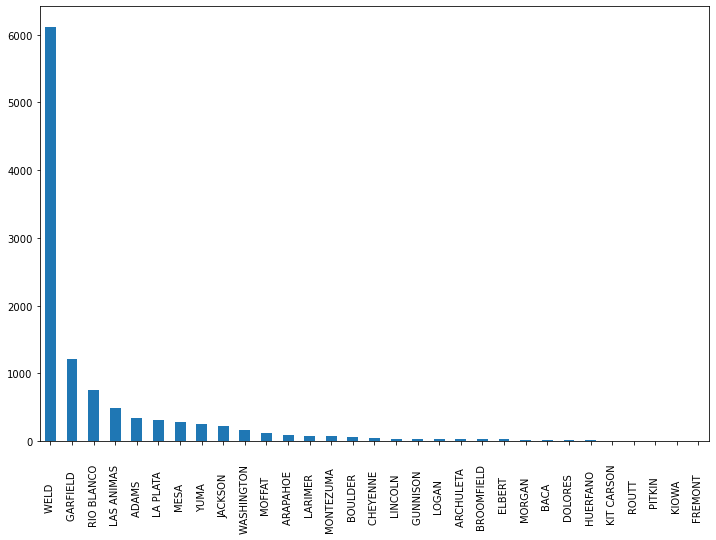

In [21]:
spills_df['County'].value_counts(dropna=False).plot.bar(figsize=(12,8))

TypeError: '<=' not supported between instances of 'int' and 'str'

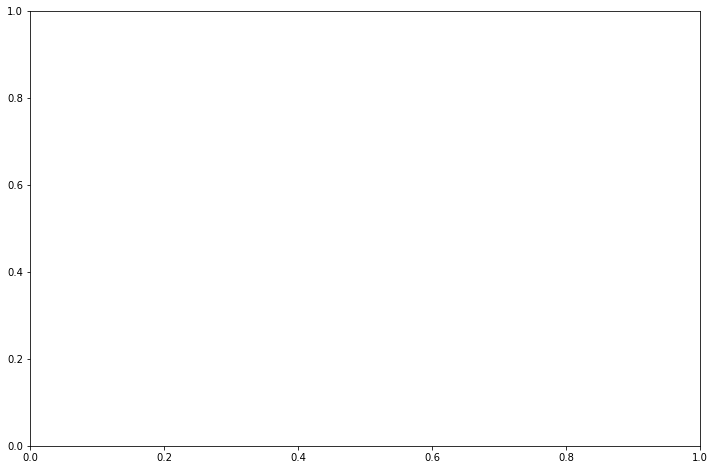

In [14]:
spills_df['Oil_BBLs_Spilled'].hist( bins=100, figsize=(12,8))

#### Ending comments and to-do:

Items to do in next lesson:

- Duplicate document_numbers?
- Initial_report_date - filter out dates before 2014; make dates into datetime format
- Oil_Spill_Volume - make into a dummy variable
- Fix type of Oil_BBLs_Spilled column
- Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y/N/n values need to be standardized
- Standardize the binary columns to 1.0/0.0: Y/N, 1.0/0.0 & True/False
- Drop columns: Report, Tracking_num, Latitude, Longitude, Municipality, Facility_ID, Weather_Conditions, Spill_Description